<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/PyTorch/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Workflow

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Simple Linear Regression

In [2]:
# Y = a+bX
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)

In [3]:
y = bias+weight*X

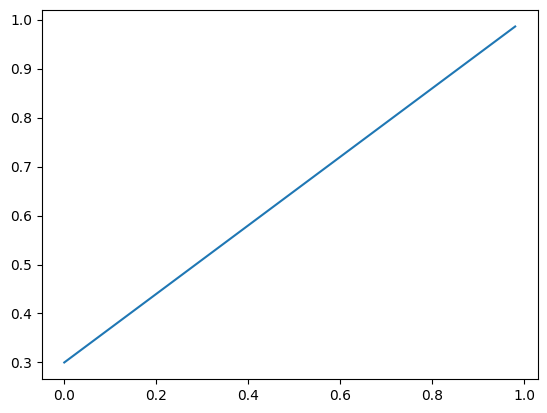

In [4]:
plt.plot(X,y)

In [5]:
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]

In [6]:
X_test,y_test = X[train_split:],y[train_split:]

In [7]:
def plot_predictions(train_data,train_labels,test_data,test_labels,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b',s=4,label="Training Data")
  plt.scatter(test_data,test_labels,c='g',s=4,label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c = 'r',s=4,label = 'Predicted Data')
  plt.legend(prop={'size':14})

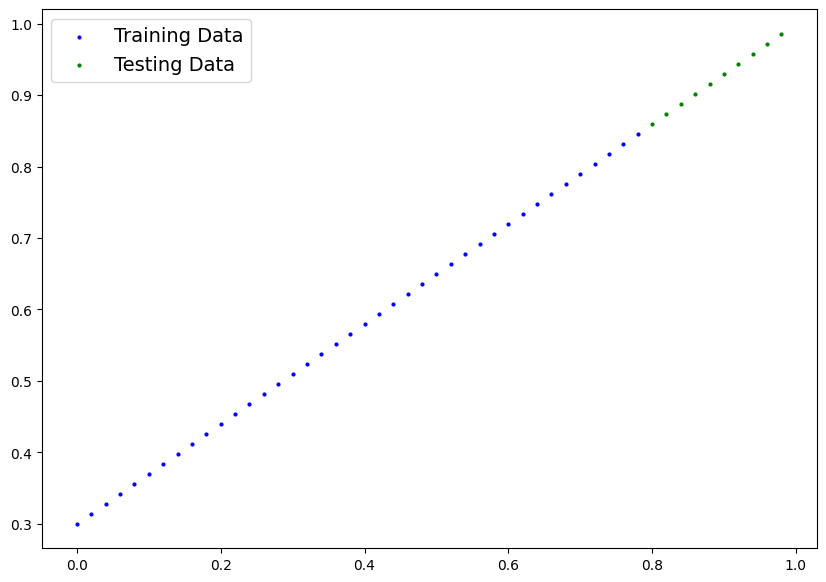

In [8]:
plot_predictions(X_train,y_train,X_test,y_test)

### Building Model

In [100]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad = True,dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad = True,dtype=torch.float))

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights*x+self.bias


In [101]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

In [102]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [103]:
with torch.inference_mode():
  y_preds = model_0(X_test).squeeze(dim=1)

In [104]:
y_preds

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

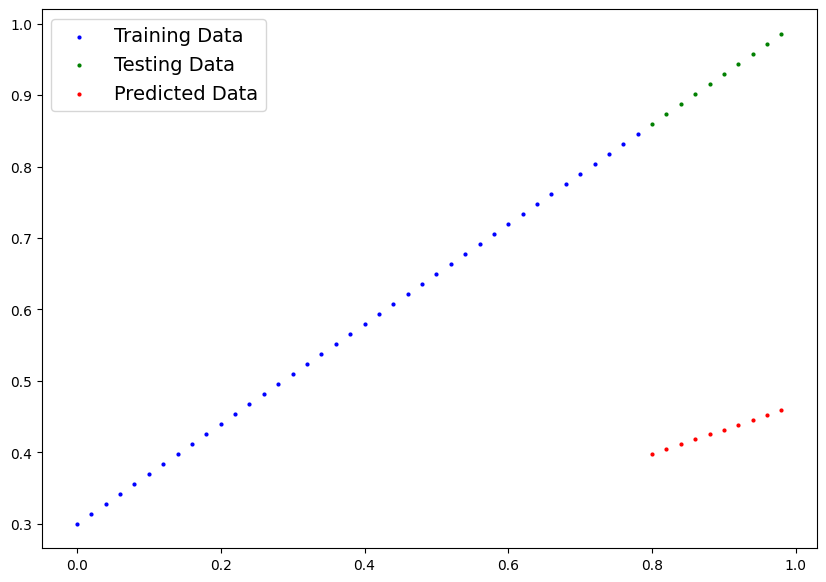

In [105]:
plot_predictions(X_train,y_train,X_test,y_test,y_preds)

### Setting up loss_fn and optimizer

In [106]:
lr = 0.01
# Setup Loss Function
loss_fn = nn.L1Loss()
# Setup Optimizer
optimizer = torch.optim.SGD(model_0.parameters(),lr = lr)

### Setting up Training Loop

In [107]:
epochs = 300
epoch_count = []
train_loss_values = []
test_loss_values = []
torch.manual_seed(42)
for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_train,y_pred)
  optimizer.zero_grad()
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred,y_test)
  if epoch%10==0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
  print(f"Epoch:{epoch}|Test Loss: {test_loss}")
  loss.backward()
  optimizer.step()

Epoch:0|Test Loss: 0.4945361614227295
Epoch:1|Test Loss: 0.48106518387794495
Epoch:2|Test Loss: 0.4675942063331604
Epoch:3|Test Loss: 0.4541231691837311
Epoch:4|Test Loss: 0.44065219163894653
Epoch:5|Test Loss: 0.4271811842918396
Epoch:6|Test Loss: 0.41371020674705505
Epoch:7|Test Loss: 0.40023916959762573
Epoch:8|Test Loss: 0.3867681920528412
Epoch:9|Test Loss: 0.37329721450805664
Epoch:10|Test Loss: 0.3598262071609497
Epoch:11|Test Loss: 0.3463551998138428
Epoch:12|Test Loss: 0.3328842222690582
Epoch:13|Test Loss: 0.3194132149219513
Epoch:14|Test Loss: 0.30594223737716675
Epoch:15|Test Loss: 0.2924712300300598
Epoch:16|Test Loss: 0.27900025248527527
Epoch:17|Test Loss: 0.2655292749404907
Epoch:18|Test Loss: 0.2520582973957062
Epoch:19|Test Loss: 0.2395961582660675
Epoch:20|Test Loss: 0.22817862033843994
Epoch:21|Test Loss: 0.21729660034179688
Epoch:22|Test Loss: 0.2069590985774994
Epoch:23|Test Loss: 0.19773726165294647
Epoch:24|Test Loss: 0.1890866756439209
Epoch:25|Test Loss: 0.181

In [108]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.6990], requires_grad=True),
 Parameter containing:
 tensor([0.3093], requires_grad=True)]

In [109]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [110]:
with torch.inference_mode():
  y_preds = model_0(X_test).squeeze(dim=1)

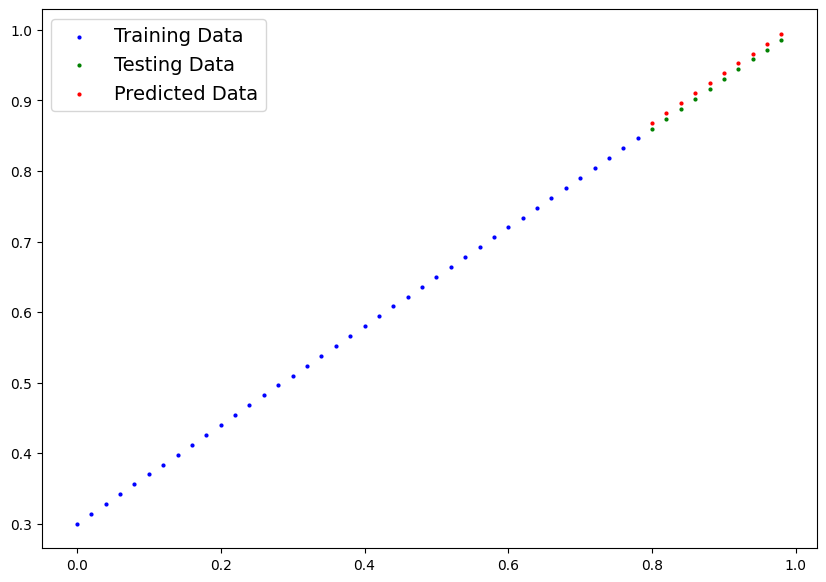

In [111]:
plot_predictions(X_train,y_train,X_test,y_test,y_preds)

### Plot Loss Curves

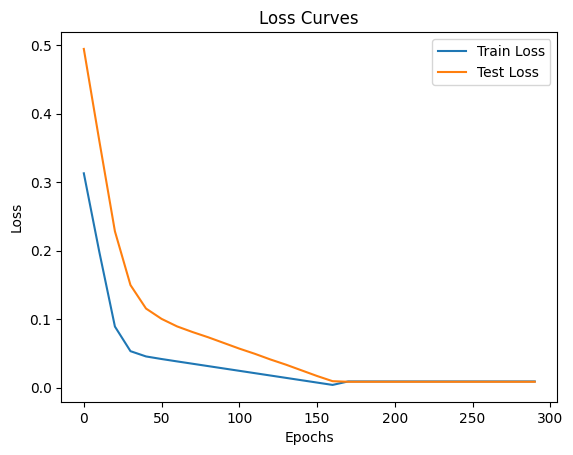

In [113]:
plt.plot(epoch_count,np.array(torch.tensor(train_loss_values).numpy()),label = "Train Loss")
plt.plot(epoch_count,np.array(torch.tensor(test_loss_values).numpy()),label = "Test Loss")
plt.title("Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

### Saving Torch Model

In [116]:
torch.save(model_0.state_dict(),f="./pytorch_workflow_0.pth")